# Regression analysis using NumPy

In this notebook, we use the NumPy library to analyze synthetic data. Our goal is to demonstrate the capabilities of NumPy through tasks like data generation and data processing.

In [1]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso

import matplotlib.pyplot as plt
import seaborn as sns

### Generating synthetic data

We start by generating synthetic data that simulates a linear relationship between `x` and `y`. Random noise is added to the `y` values.

In [2]:
# creating synthetic data
np.random.seed(1234)
num_samples = 100
# create an array 100 evenly spaced values between 0 and 10
x1= np.linspace(0, 10, num_samples)
# Create a vector with values ranging from 1 to 100, inverse each, then reverse the order
x2 = 1/np.arange(1,101)
x2 = x2[::-1]
# Combine x1 and x2 to form x
x = x1+x2
# calculate y based on a linear relation and add a random noise from a standard normal distribution
y = 2 * x + np.ones(num_samples) + np.random.randn(num_samples) * 3

print('First 5 X values: ', x[:5])
print('First 5 Y values: ', y[:5])

First 5 X values:  [0.01       0.11111111 0.21222428 0.31333958 0.41445707]
First 5 Y values:  [ 2.43430549 -2.35070486  5.72256947  0.68872347 -0.33285206]


### Data analysis

We will perform basic analysis using Numpy. We will calculate the mean and the standard deviation of `y` to gain insights into the central tendency and variability of the data.

In addition, we will try to understand the distribution of `y`.

Minimum of Y: -3.8878950223963766
25th percentile of Y: 6.285339610820896
Median of Y: 10.652386860939664
75th percentile of Y: 17.11783521970541
Maximum of Y: 23.337574741955386
Range of Y: 27.225469764351764

Mean of Y: 11.2090843997291
Median of Y: 10.652386860939664
Standard deviation of Y: 6.593397306117533
Interquartile range of Y: 10.832495608884514
Skewness of Y: -0.06661997288890834
Kurtosis of Y: -0.8184870635586425


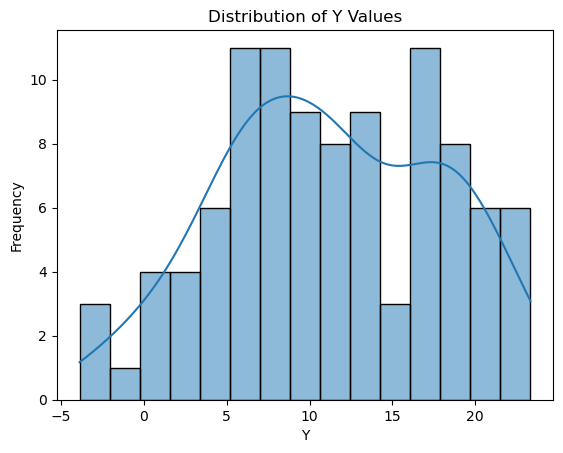

In [3]:
min_y = np.min(y)
percentile_25_y = np.percentile(y, 25)
median_y = np.median(y)
percentile_75_y = np.percentile(y, 75)
max_y = np.max(y)
range_y = np.ptp(y)
print("Minimum of Y:", min_y)
print("25th percentile of Y:", percentile_25_y)
print("Median of Y:", median_y)
print("75th percentile of Y:", percentile_75_y)
print("Maximum of Y:", max_y)
print("Range of Y:", range_y)

mean_y = np.mean(y)
median_y = np.median(y)
std_y = np.std(y)
iqr_y = np.percentile(y, 75) - np.percentile(y, 25)
skewness = np.mean((y - mean_y) ** 3) / std_y ** 3
kurtosis = np.mean((y - mean_y) ** 4) / std_y ** 4 - 3
print("\nMean of Y:", mean_y)
print("Median of Y:", median_y)
print("Standard deviation of Y:", std_y)
print("Interquartile range of Y:", iqr_y)
print("Skewness of Y:", skewness)
print("Kurtosis of Y:", kurtosis)

sns.histplot(y, bins=15, kde=True)
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Distribution of Y Values')
plt.show()

#### Detecting outliers

We will try assess data quality by identifying outliers.

In [4]:
z_scores = np.abs((y - np.mean(y)) / np.std(y))
outliers_indices = np.where(z_scores > 3)[0]
print("Indices of outliers:", outliers_indices)

Indices of outliers: []


We see that no outliers detected.

#### Correlation coefficient

We will try to understand the variable relationships with the correlation coefficient to measure the strength and direction of their relationship.

Correlation coefficient: 0.8915528672736572
Covariance between X and Y: 17.656704887703537


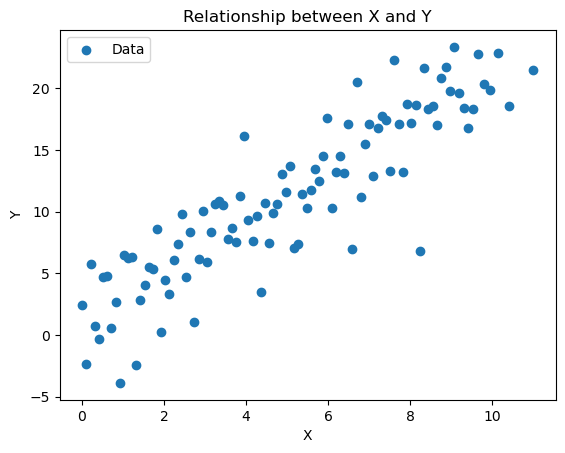

In [5]:
# Calculate correlation coefficient and covariance
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print("Correlation coefficient:", correlation_coefficient)
covariance = np.cov(x, y)[0, 1]
print("Covariance between X and Y:", covariance)

# Visualizing the variable relationships
plt.scatter(x, y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship between X and Y')
plt.legend()
plt.show()

Based on our analysis so far, we've made the following observations:

1. The distribution of `y` values appears to be roughly centered around a linear relationship.
2. Outliers are not detected, indicating a relatively clean dataset.
3. The correlation coefficient between `x` and `y` suggests a strong positive relationship.

## Regression analysis
We will use regression analysis to model the relationship we've observed. We'll start with linear regression. Next, we'll explore polynomial regression to accommodate potential non-linear patterns in the data.

#### Linear regression
We predict `y` based on `x` to fit a linear model to the data. We will also check the residuals to understand how well the linear model fits the data. We have two methods to perform linear regression with NumPy. Both methods achieve the same goal of finding the best linear fit for the data but use different approaches and functions.

##### Option 1: Linear regression using the least squares method

In [6]:
# Add a column of ones to x for the intercept term
X = np.vstack((x, np.ones(len(x)))).T

# Perform linear regression using the least squares method
coefficients_linear, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

# Compute the predicted values
best_fit_linear = X @ coefficients_linear

equation = f"y = {coefficients_linear[0]:.4f}x + {coefficients_linear[1]:.4f}"
print("Linear regression results:")
print("Slope:", coefficients_linear[0])
print("Intercept:", coefficients_linear[1])
print("Equation of the best fit line:", equation)

# Calculate the residuals
residuals = y - best_fit_linear

Linear regression results:
Slope: 1.9768232570749507
Intercept: 1.2224228291533688
Equation of the best fit line: y = 1.9768x + 1.2224


**Explanation:**

- Adding a column of ones: 
  - `X = np.vstack((x, np.ones(len(x)))).T` creates a 2D array `X` where each row contains an `x` value and a `1`. The `1` is added to represent the intercept in the linear regression equation. `np.vstack` stacks `x` and a column of ones vertically, and `.T` transposes the matrix to the correct shape.

- Performing linear regression: 
  - `np.linalg.lstsq(X, y, rcond=None)` solves the linear least squares problem to find the coefficients of the linear equation that minimizes the sum of squared residuals. It returns the coefficients (`coefficients_linear`), the sum of residuals (`residuals`), the rank of the matrix, and singular values.
  - `coefficients_linear[0]` is the slope of the line, and `coefficients_linear[1]` is the intercept.

- Computing predicted values:
  - `best_fit_linear = X @ coefficients_linear` calculates the predicted `y` values (`best_fit_linear`) using the equation of the best fit line. `@` is the matrix multiplication operator.

##### Option 2: Linear regression using `np.polyfit`

In [7]:
# calculates the coefficients of a polynomial of degree 1 (linear)
coefficients_linear = np.polyfit(x, y, 1)
# compute the predicted values
best_fit_linear = np.polyval(coefficients_linear, x)

equation = f"y = {coefficients_linear[0]:.4f}x + {coefficients_linear[1]:.4f}"
print("Linear regression results:")
print("Slope:", coefficients_linear[0])
print("Intercept:", coefficients_linear[1])
print("Equation of the best fit line:", equation)

# calculate the residuals
residuals = y - best_fit_linear

Linear regression results:
Slope: 1.97682325707495
Intercept: 1.222422829153367
Equation of the best fit line: y = 1.9768x + 1.2224


**Explanation:**

- Calculate the coefficients of a polynomial of degree 1 (linear): 
  - `np.polyfit(x, y, 1)` finds the coefficients of a polynomial (in this case, a linear polynomial of degree 1) that best fits the data in a least-squares sense. It returns an array with the slope and intercept.

- Computing predicted values: 
  - `np.polyval(coefficients_linear, x)` evaluates the polynomial (using the calculated coefficients) at each `x` value to produce the predicted `y` values (`best_fit_linear`).

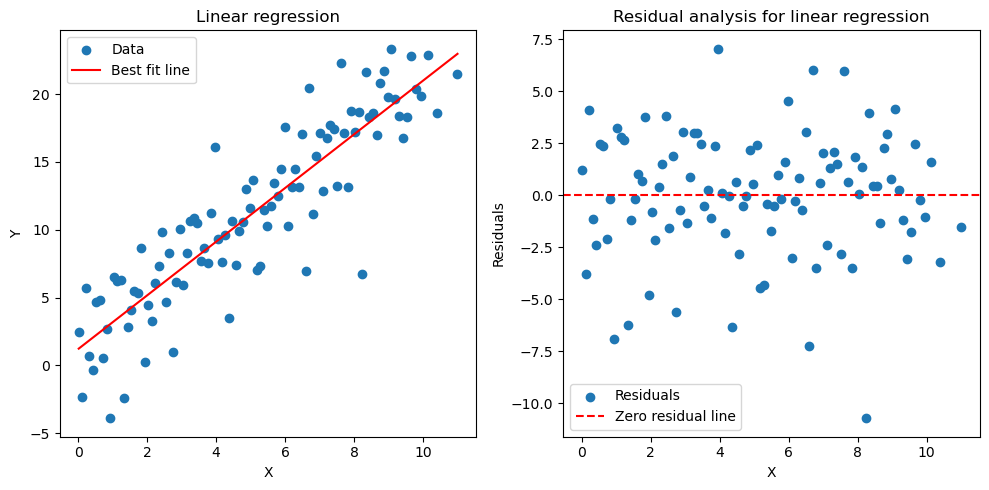

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# linear regression plot
ax1.scatter(x, y, label='Data')
ax1.plot(x, best_fit_linear, color='red', label='Best fit line')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Linear regression')
ax1.legend()

# residual plot
ax2.scatter(x, residuals, label='Residuals')
ax2.axhline(y=0, color='red', linestyle='--', label='Zero residual line')
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual analysis for linear regression')
ax2.legend()

plt.tight_layout()
plt.show()

#### Polynomial regression

While linear regression fits a straight line to the data, polynomial regression fits a polynomial curve. Let's explore how NumPy can help us perform polynomial regression and visualize the results.

Polynomial regression results:
Coefficients: [-0.00297541  0.05945013 -0.38714615  2.89706145]
Slope: 0.6468123452841766
Polynomial Regression Equation: y = -0.0030x^4 + 0.0595x^3 + -0.3871x^2 + 2.8971x^1 + 0.6468


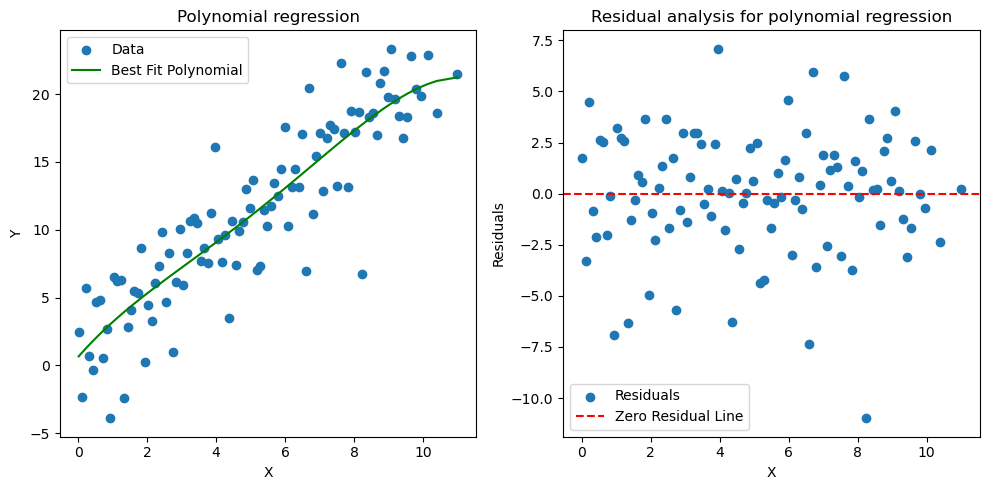

In [9]:
degree = 4
coefficients_poly = np.polyfit(x, y, degree)
best_fit_poly = np.polyval(coefficients_poly, x)

equation = "y = "
for i, coeff in enumerate(coefficients_poly):
    equation += f"{coeff:.4f}x^{degree - i}"
    if i < degree:
        equation += " + "
equation = equation.replace("x^0", "")
print("Polynomial regression results:")
print("Coefficients:", coefficients_poly[:degree])
print("Slope:", coefficients_poly[degree])
print("Polynomial Regression Equation:", equation)

# calculate the residuals
residuals_poly = y - best_fit_poly

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# polynomial regression plot
ax1.scatter(x, y, label='Data')
ax1.plot(x, best_fit_poly, color='green', label='Best Fit Polynomial')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Polynomial regression')
ax1.legend()

# residual Plot
ax2.scatter(x, residuals_poly, label='Residuals')
ax2.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual analysis for polynomial regression')
ax2.legend()

plt.tight_layout()
plt.show()

Polynomial coefficients magnitude:
x^4: 0.0030
x^3: 0.0595
x^2: 0.3871
x^1: 2.8971
x^0: 0.6468


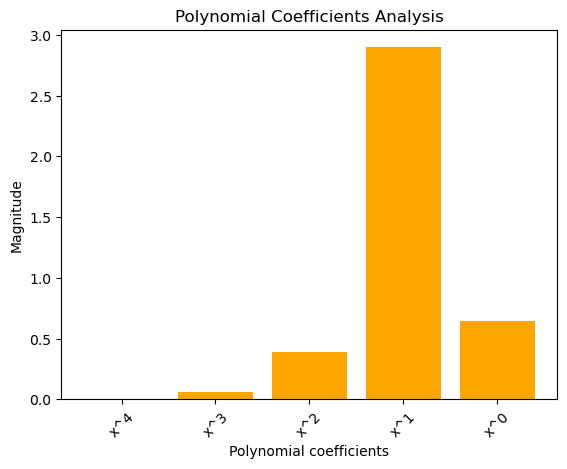

In [10]:
# analyze polynomial coefficients
coeff_magnitudes = np.abs(coefficients_poly)
coeff_names = [f"x^{degree - i}" for i in range(degree + 1)]

print("Polynomial coefficients magnitude:")
for coeff, name in zip(coeff_magnitudes, coeff_names):
    print(f"{name}: {coeff:.4f}")

plt.bar(coeff_names, coeff_magnitudes, color='orange')
plt.xlabel('Polynomial coefficients')
plt.ylabel('Magnitude')
plt.title('Polynomial Coefficients Analysis')
plt.xticks(rotation=45)
plt.show()

#### Comparison: linear vs. polynomial regression

We evaluate the performance of both regression methods. Linear regression captures a linear trend, while polynomial regression can capture more complex relationships.

Total sum of squares (TSS): 4347.288803631794

Linear regression evaluation:
Residual sum of squares (RSS): 891.7745019649833
R-squared: 0.7948665151438798
RMSE: 2.9862593691188035

Polynomial regression evaluation:
Residual sum of squares (RSS): 885.2499737176529
R-squared: 0.7963673421057048
RMSE: 2.975315065195034


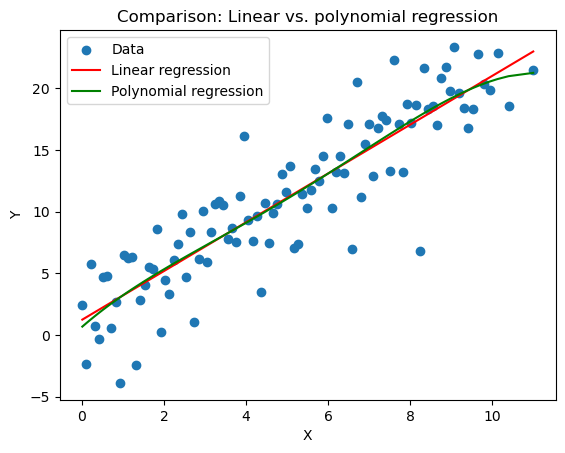

In [11]:
tss = np.sum(np.square(y - np.mean(y)))
print("Total sum of squares (TSS):", tss)

# linear regression evaluation
rss_linear = np.sum(np.square(y - best_fit_linear))
r2_linear = r2_score(y, best_fit_linear)
rmse_linear = np.sqrt(mean_squared_error(y, best_fit_linear))
print("\nLinear regression evaluation:")
print("Residual sum of squares (RSS):", rss_linear)
print("R-squared:", r2_linear)
print("RMSE:", rmse_linear)

# polynomial regression evaluation
rss_poly = np.sum(np.square(y - best_fit_poly))
r2_poly = r2_score(y, best_fit_poly)
rmse_poly = np.sqrt(mean_squared_error(y, best_fit_poly))
print("\nPolynomial regression evaluation:")
print("Residual sum of squares (RSS):", rss_poly)
print("R-squared:", r2_poly)
print("RMSE:", rmse_poly)

# comparison plot
plt.scatter(x, y, label='Data')
plt.plot(x, best_fit_linear, color='red', label='Linear regression')
plt.plot(x, best_fit_poly, color='green', label='Polynomial regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison: Linear vs. polynomial regression')
plt.legend()
plt.show()

After evaluating both linear and polynomial regression:

1. **Linear regression:** The linear regression model explains about 79.5% of the variability in the data, and its predictions have an average error of approximately 2.99.

2. **Polynomial regression:** The polynomial regression model performs similarly, with an R-squared value of about 79.6% and an average prediction error of around 2.98.

Both models show comparable performance in capturing the relationships in the data and making predictions.

##### Impact of polynomial degree

To assess the impact of overfitting, we'll analyze how different polynomial degrees affect the model's performance. This analysis will provide insights into whether a higher degree polynomial leads to better predictions or results in overfitting the data.

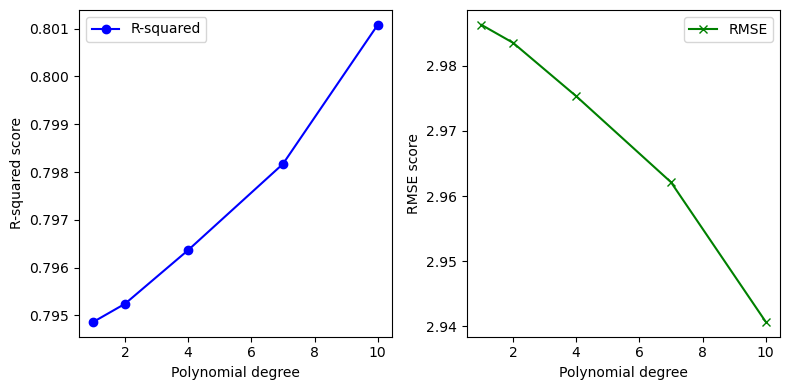

In [12]:
# polynomial degrees to explore
degrees = [1, 2, 4, 7, 10]  
r2_scores = []
rmse_scores = []

for degree in degrees:
    coefficients = np.polyfit(x, y, degree)
    best_fit = np.polyval(coefficients, x)
    r2 = r2_score(y, best_fit)
    rmse = np.sqrt(mean_squared_error(y, best_fit))
    r2_scores.append(r2)
    rmse_scores.append(rmse)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# R-squared plot
ax1.plot(degrees, r2_scores, marker='o', color='blue', label='R-squared')
ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('R-squared score')
ax1.legend()

# RMSE plot
ax2.plot(degrees, rmse_scores, marker='x', color='green', label='RMSE')
ax2.set_xlabel('Polynomial degree')
ax2.set_ylabel('RMSE score')
ax2.legend()

plt.tight_layout()
plt.show()

1. R-squared increase: As the polynomial degree increases, the R-squared value tends to increase. 
2. RMSE decrease: Similarly, as the polynomial degree increases, the RMSE value tends to decrease.

This might initially suggest that higher-degree polynomials provide a better fit to the data. However, an overly complex model can capture noise in the data and lead to overfitting. Therefore, careful consideration is needed when selecting the appropriate polynomial degree to strike a balance between model complexity and generalization ability.

### Modeling nonlinear data

In this section, we'll explore modeling nonlinear data using polynomial regression. We will generate synthetic nonlinear data and fit polynomial regression models.

Nonlinear data curve fitting results:
R-squared: 0.910500594117463
RMSE: 0.9006306282533173

Square root transformation curve fitting results:
R-squared: 0.8169194323670111
RMSE: 1.2881242644158728

Log transformation curve fitting results:
R-squared: 0.8186082610729289
RMSE: 1.282169341577748


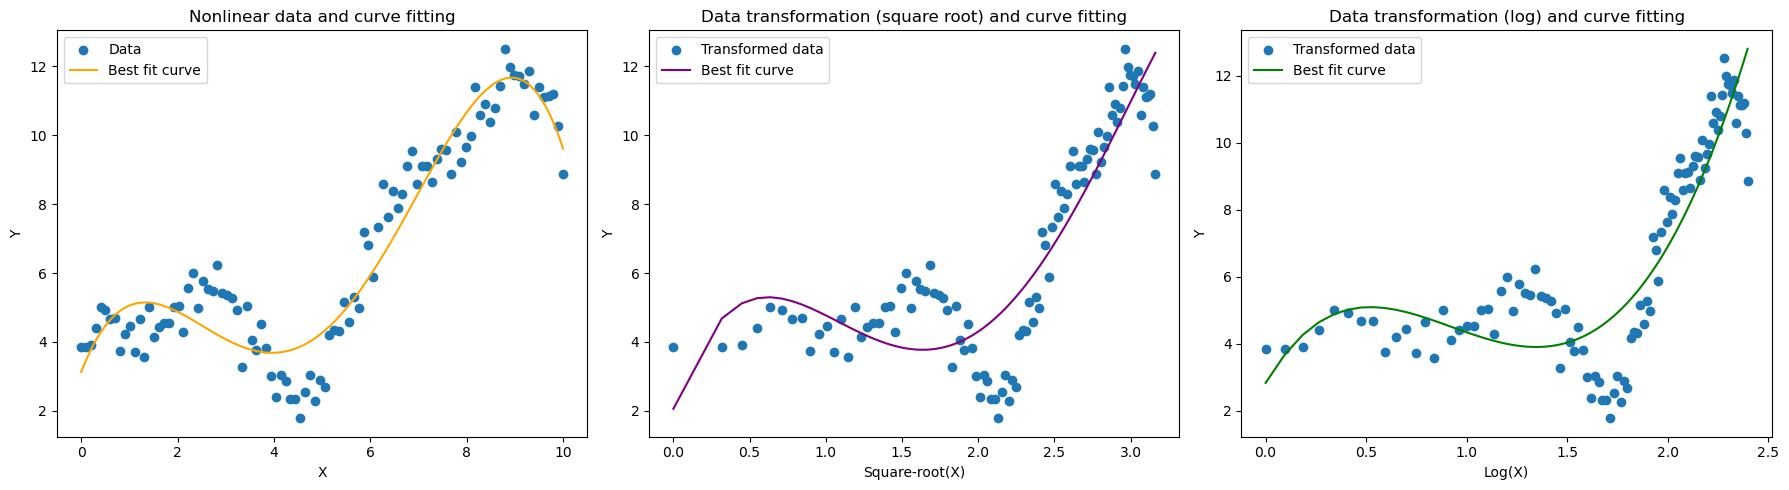

In [13]:
# generating nonlinear data and curve fitting
np.random.seed(2355)
num_samples_nonlinear = 100
x_nonlinear = np.linspace(0, 10, num_samples_nonlinear)
y_nonlinear = 3 * np.sin(x_nonlinear) + np.random.randn(num_samples_nonlinear) * 0.5
y_nonlinear = np.ones(100) + 0.01*x + 0.05*x**2 + 2*np.sin(x) + 1.05*np.cos(2*x) + 2*np.exp(0.1*x) + np.random.randn(num_samples)*0.5

degree_nonlinear = 4
coefficients_nonlinear = np.polyfit(x_nonlinear, y_nonlinear, degree_nonlinear)
best_fit_nonlinear = np.polyval(coefficients_nonlinear, x_nonlinear)

# data transformations
x_transformed_sqrt = np.sqrt(x_nonlinear)
x_transformed_log = np.log(x_nonlinear + 1)  # adding 1 to avoid negative values
coefficients_transformed_sqrt = np.polyfit(x_transformed_sqrt, y_nonlinear, degree_nonlinear)
coefficients_transformed_log = np.polyfit(x_transformed_log, y_nonlinear, degree_nonlinear)
best_fit_transformed_sqrt = np.polyval(coefficients_transformed_sqrt, x_transformed_sqrt)
best_fit_transformed_log = np.polyval(coefficients_transformed_log, x_transformed_log)

# calculate R-squared and RMSE for each transformation
r2_nonlinear = r2_score(y_nonlinear, best_fit_nonlinear)
rmse_nonlinear = np.sqrt(mean_squared_error(y_nonlinear, best_fit_nonlinear))
print("Nonlinear data curve fitting results:")
print("R-squared:", r2_nonlinear)
print("RMSE:", rmse_nonlinear)
r2_transformed_sqrt = r2_score(y_nonlinear, best_fit_transformed_sqrt)
rmse_transformed_sqrt = np.sqrt(mean_squared_error(y_nonlinear, best_fit_transformed_sqrt))
print("\nSquare root transformation curve fitting results:")
print("R-squared:", r2_transformed_sqrt)
print("RMSE:", rmse_transformed_sqrt)
r2_transformed_log = r2_score(y_nonlinear, best_fit_transformed_log)
rmse_transformed_log = np.sqrt(mean_squared_error(y_nonlinear, best_fit_transformed_log))
print("\nLog transformation curve fitting results:")
print("R-squared:", r2_transformed_log)
print("RMSE:", rmse_transformed_log)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# nonlinear data
ax1.scatter(x_nonlinear, y_nonlinear, label='Data')
ax1.plot(x_nonlinear, best_fit_nonlinear, color='orange', label='Best fit curve')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Nonlinear data and curve fitting')
ax1.legend()

# square root transformation
ax2.scatter(x_transformed_sqrt, y_nonlinear, label='Transformed data')
ax2.plot(x_transformed_sqrt, best_fit_transformed_sqrt, color='purple', label='Best fit curve')
ax2.set_xlabel('Square-root(X)')
ax2.set_ylabel('Y')
ax2.set_title('Data transformation (square root) and curve fitting')
ax2.legend()

# log transformation
ax3.scatter(x_transformed_log, y_nonlinear, label='Transformed data')
ax3.plot(x_transformed_log, best_fit_transformed_log, color='green', label='Best fit curve')
ax3.set_xlabel('Log(X)')
ax3.set_ylabel('Y')
ax3.set_title('Data transformation (log) and curve fitting')
ax3.legend()

plt.tight_layout()
plt.show()

The original nonlinear data curve fitting yielded the best model performance, outperforming the transformed data cases.

#### Comparing with regularization techniques

We compare regular polynomial regression with Ridge and Lasso regression.

Polynomial regression results:
R-squared: 0.910500594117463
RMSE: 0.9006306282533173

Ridge regression results:
R-squared: 0.9063754894665834
RMSE: 0.9211522475778503

Lasso regression results:
R-squared: 0.9094739916525558
RMSE: 0.9057812397958563


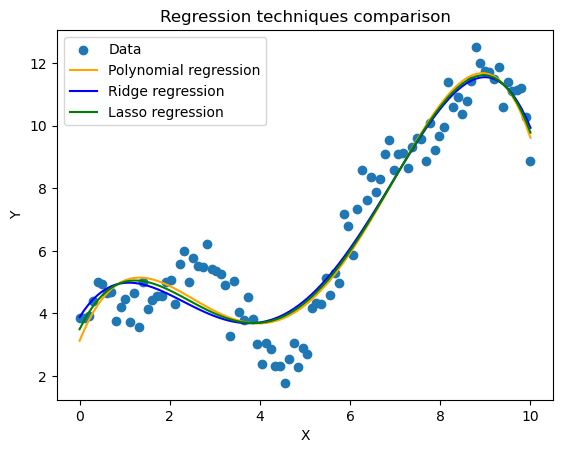

In [14]:
# regular polynomial regression
print("Polynomial regression results:")
print("R-squared:", r2_nonlinear)
print("RMSE:", rmse_nonlinear)

# ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(np.vander(x_nonlinear, degree_nonlinear + 1), y_nonlinear)
predictions_ridge = ridge_model.predict(np.vander(x_nonlinear, degree_nonlinear + 1))
r2_ridge = r2_score(y_nonlinear, predictions_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_nonlinear, predictions_ridge))
print("\nRidge regression results:")
print("R-squared:", r2_ridge)
print("RMSE:", rmse_ridge)

# lasso regression
lasso_model = Lasso(alpha=0.01, max_iter=130000)
lasso_model.fit(np.vander(x_nonlinear, degree_nonlinear + 1), y_nonlinear)
predictions_lasso = lasso_model.predict(np.vander(x_nonlinear, degree_nonlinear + 1))
r2_lasso = r2_score(y_nonlinear, predictions_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_nonlinear, predictions_lasso))
print("\nLasso regression results:")
print("R-squared:", r2_lasso)
print("RMSE:", rmse_lasso)

plt.scatter(x_nonlinear, y_nonlinear, label='Data')
plt.plot(x_nonlinear, best_fit_nonlinear, color='orange', label='Polynomial regression')
plt.plot(x_nonlinear, predictions_ridge, color='blue', label='Ridge regression')
plt.plot(x_nonlinear, predictions_lasso, color='green', label='Lasso regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression techniques comparison')
plt.legend()
plt.show()

Polynomial regression and ridge regression showcase better performance compared to lasso regression. When we increase the number of iterations for the Lasso model we get better performance as well.

Overall, this project highlights the importance of proper model selection, transformation techniques, and regularization strategies for optimal predictive performance.